# Physics 760: Computational Physics
## WS 2022/23
### Week 6
#### Pugazharasu Anancia Devaneyan, Rishi Kumar Senthil Kumar

In [130]:
#setup the notebook
%pylab inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math as mth
from scipy import special
from scipy.fft import fft, ifft

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


C:\Users\pugaz\AppData\Roaming\Python\Python311\site-packages\IPython\core\magics\pylab.py:162: UserWarning: pylab import has clobbered these variables: ['ifft', 'fft']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


# Simulating the Ising model in $d=2$ using the Metropolis-Hasting algorithm

In [131]:
def deltaE(S0, Sn, J, H):
    return 2 * S0 * (H + J * Sn)

Now we implement Metropolis-Hastings algorithm as detailled in the lecture.

In [184]:
def accept_reject(sweeps, N, J, h, freq=10):
    markov_chain = []
    
    spin_list = 2*np.random.randint(2, size=(N,N)) - 1
    final_config = spin_list
    for i in range(sweeps):
        spin_flip_i = np.random.randint(N)
        spin_flip_j = np.random.randint(N)
        
        Sn = spin_list[(spin_flip_i - 1) % N, spin_flip_j] + spin_list[(spin_flip_i + 1) % N, spin_flip_j] + \
             spin_list[spin_flip_i, (spin_flip_j - 1) % N] + spin_list[spin_flip_i, (spin_flip_j + 1) % N]

        change_E = deltaE(spin_list[spin_flip_i,spin_flip_j],Sn,J,h)
        
        rand = np.random.random()
        
        markov_chain.append(spin_list)
        #Check if 
        if rand<=min(1,np.exp(-1*(change_E))):
            #flip the spin
            spin_list[spin_flip_i,spin_flip_j]*=-1
        else:
            pass
        
    return markov_chain

In [133]:
def correlation(t,phi_list):
    mean = np.mean(phi_list)
    N = len(phi_list)
    summand = 0
    for i in range(N-t):
        summand += (phi_list[i]-mean)*(phi_list[i+t]-mean)
    summand = summand/(N-t)
    return summand

In [182]:
def autocorrelation(t,phi_list):
    return  correlation(t,phi_list)/correlation(0,phi_list)

In [43]:
def normalized_time(phi_list,W):
    summand = 0
    for t in range(W):
        summand += autocorrelation(t,phi_list)
    summand += 0.5 * autocorrelation(0,phi_list)
    return summand

In [208]:
def spin_correlation(spin_list,N,r):
    corr = 0
    ffted = fft(spin_list.flatten())
    corr = ffted[0]*ffted[0]
    for k in range(1,N**2):
        #corr += (fft(spin_list)*ifft(spin_list))*np.exp(r*k*(0+1j))
        corr += ffted[k]*ffted[(N**2)-k]*np.exp(r*k*(1j))
    corr = corr/(N**4)
    return np.real(corr)

In [185]:
spin_list_3 = accept_reject(20000, 3, 0.440686793509772, 0, freq=10)
spin_list_7 = accept_reject(20000, 7, 0.440686793509772, 0, freq=10)
spin_list_11 = accept_reject(20000, 11, 0.440686793509772, 0, freq=10)
spin_list_15 = accept_reject(20000, 15, 0.440686793509772, 0, freq=10)
spin_list_19 = accept_reject(20000, 19, 0.440686793509772, 0, freq=10)
spin_list_23 = accept_reject(20000, 23, 0.440686793509772, 0, freq=10)

In [214]:
display(spin_correlation(spin_list_23[1],23,0))

0.9999999999999984

In [232]:
N_list = [3,7,11,15,19,23]
spin_lists = {"3": spin_list_3[10],
              "7": spin_list_7[1000],
              "11":spin_list_11[1000],
              "15":spin_list_15[1000],
              "19":spin_list_19[1000],
              "23":spin_list_23[1000]}
plot_list = []
for n in N_list:
    r_list = np.linspace(0,n,dtype=int)
    temp_list = []
    for r in r_list:
        temp_list.append(spin_correlation(spin_lists[str(n)],n,r))
    plot_list.append(temp_list)

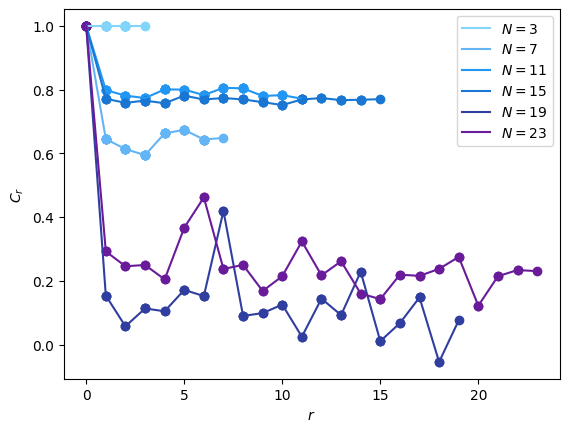

In [239]:
Blues= ['#81d4fa','#64b5f6','#2196f3','#1976d2','#303f9f','#512da8','#6a1b9a']
plt.scatter(np.linspace(0,3,dtype=int),[float(i) for i in plot_list[0]],color = Blues[0])
plt.plot(np.linspace(0,3,dtype=int),[float(i) for i in plot_list[0]],color = Blues[0],label = '$N = 3$')
plt.scatter(np.linspace(0,7,dtype=int),[float(i) for i in plot_list[1]],color = Blues[1])
plt.plot(np.linspace(0,7,dtype=int),[float(i) for i in plot_list[1]],color = Blues[1],label = '$N = 7$')
plt.scatter(np.linspace(0,11,dtype=int), [float(i) for i in plot_list[2]], color =Blues[2])
plt.plot(np.linspace(0,11,dtype=int), [float(i) for i in plot_list[2]], color =Blues[2],label = '$N = 11$')
plt.scatter(np.linspace(0,15,dtype=int), [float(i) for i in plot_list[3]], color =Blues[3])
plt.plot(np.linspace(0,15,dtype=int), [float(i) for i in plot_list[3]], color =Blues[3],label = '$N = 15$')
plt.scatter(np.linspace(0,19,dtype=int), [float(i) for i in plot_list[4]], color = Blues[4])
plt.plot(np.linspace(0,19,dtype=int), [float(i) for i in plot_list[4]], color = Blues[4],label = '$N = 19$')
plt.scatter(np.linspace(0,23,dtype=int), [float(i) for i in plot_list[5]], color = Blues[6])
plt.plot(np.linspace(0,23,dtype=int), [float(i) for i in plot_list[5]], color = Blues[6],label = '$N = 23$')

plt.legend()

plt.xlabel('$r$')
plt.ylabel('$C_{r}$')

plt.savefig('Plots/cvr.png',dpi=300, bbox_inches = "tight")

In [216]:
def numerical_mag(lattice,N):
    mag = np.abs(np.sum(lattice))/N**2
    #for i in range(N):
     #   for j in range(N):
      #      mag += lattice[i,j]
    #mag = mag/(N**2)
    return mag